In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def estimate_q(df):
    df.index += 1
    df["q_est"] = df["posterior_error_prob"].cumsum() / df.index
    return df

def estimate_and_save(output_dir, N_values):
    for n in N_values:
        df = pd.read_csv(f"{output_dir}/{n}/peptide.target.txt", sep="\t")
        df = estimate_q(df)
        columns_to_drop = ["PSMId", "filename", "peptide", "proteinIds"]
        df = df.drop(columns=columns_to_drop)
        df.to_csv(f"{output_dir}/{n}/q_pep.txt", sep='\t', index=False)

In [10]:
output_dir = "output"
# models = ["tdcPEP", "ipPEP", "isoPEP", "splinePEP"]
models = ["tdcPEP"]
N_values = [i for i in range(4)]
num_runs = 10
for n in range(1, num_runs + 1):
    for model in models:
        estimate_and_save(f"{output_dir}/run{n}/{model}", N_values)

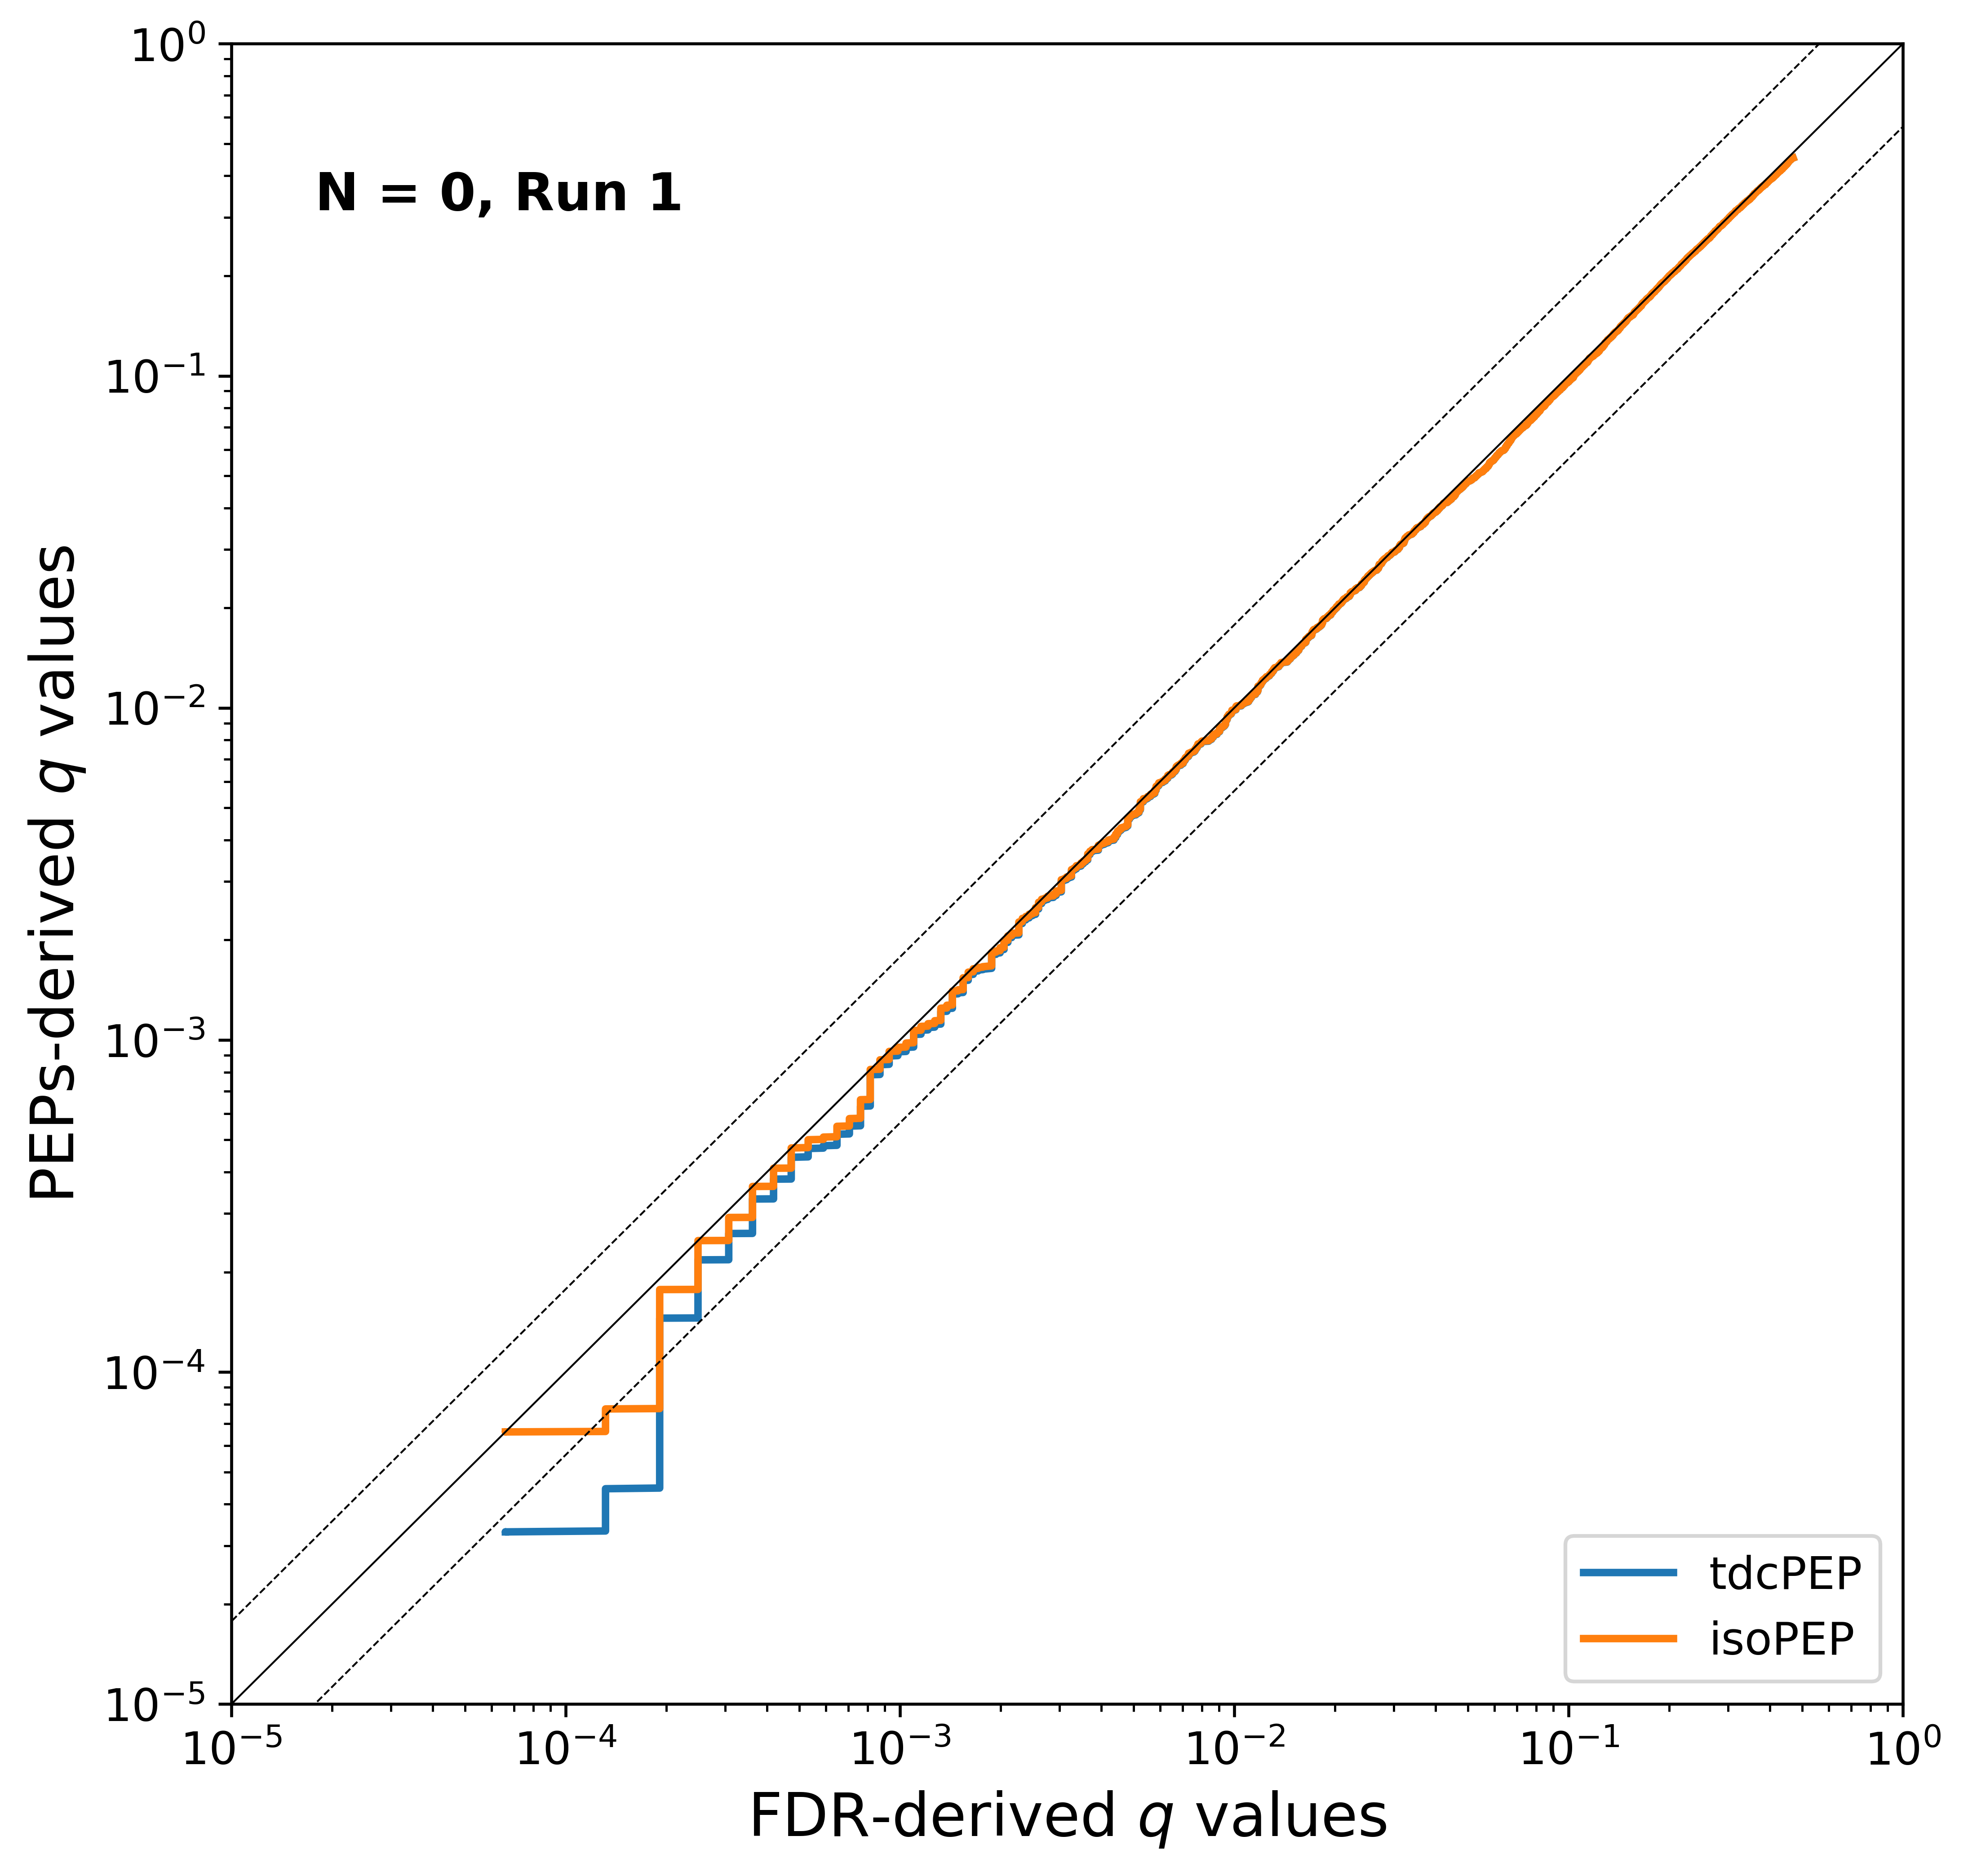

In [15]:
N = 0
run = 1
output_dir = "output"
models = ["tdcPEP", "isoPEP"]
# models = ["tdcPEP", "ipPEP", "isoPEP", "splinePEP"]
plt.figure(figsize=(8, 8), dpi=600)
plt.text(0.05, 0.9, f"N = {N}, Run {run}", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
for model in models:
    df = pd.read_csv(f"{output_dir}/run{run}/{model}/{N}/q_pep.txt", sep="\t")
    plt.plot(df["q-value"], df["q_est"], label=f"{model}", linewidth=2)
a = np.linspace(0, 1, 100)
b = a / 10 ** 0.25
c = a * 10 ** 0.25
plt.plot(a, b, c="k", linewidth=0.5, linestyle="--")
plt.plot(a, c, c="k", linewidth=0.5, linestyle="--")
plt.plot(a, a, c="k", linewidth=0.5)
plt.xlabel("FDR-derived $q$ values", fontsize=16)
plt.ylabel("PEPs-derived $q$ values", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.00001, 1)
plt.ylim(0.00001, 1)
# plt.savefig(f"figs/interp_vs_basic.logit_mean_bm.png",bbox_inches="tight")
plt.show()


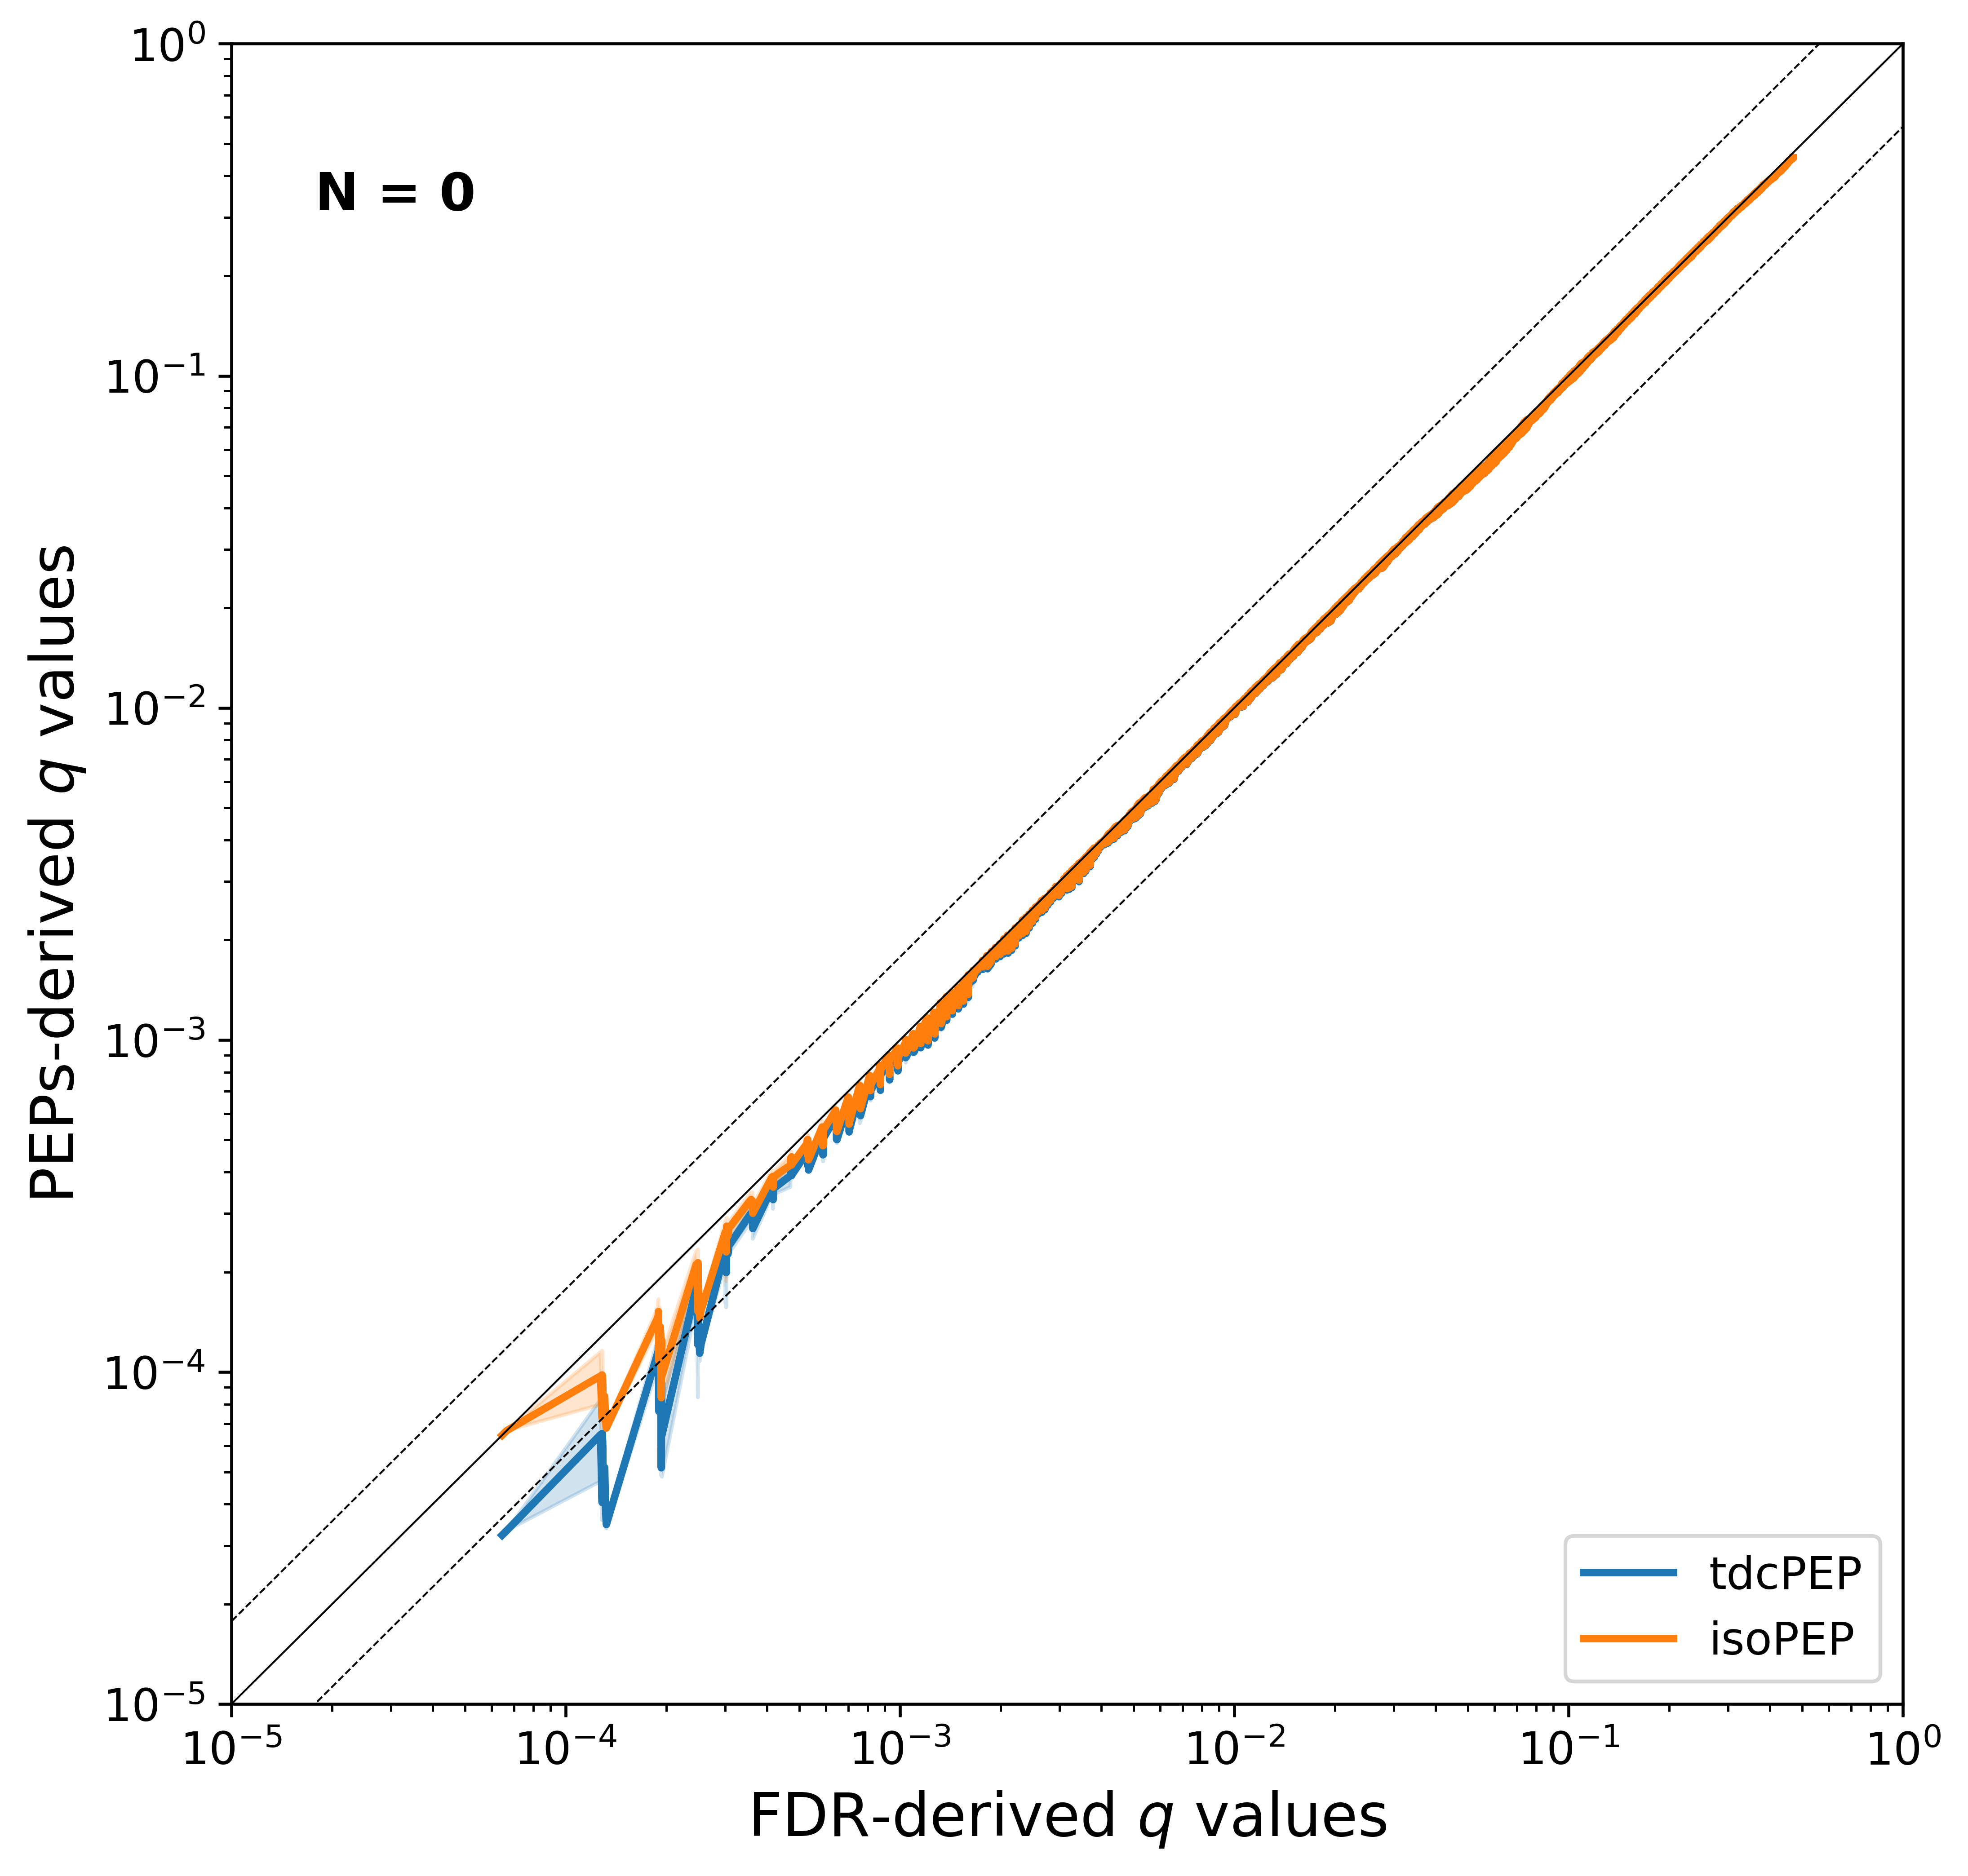

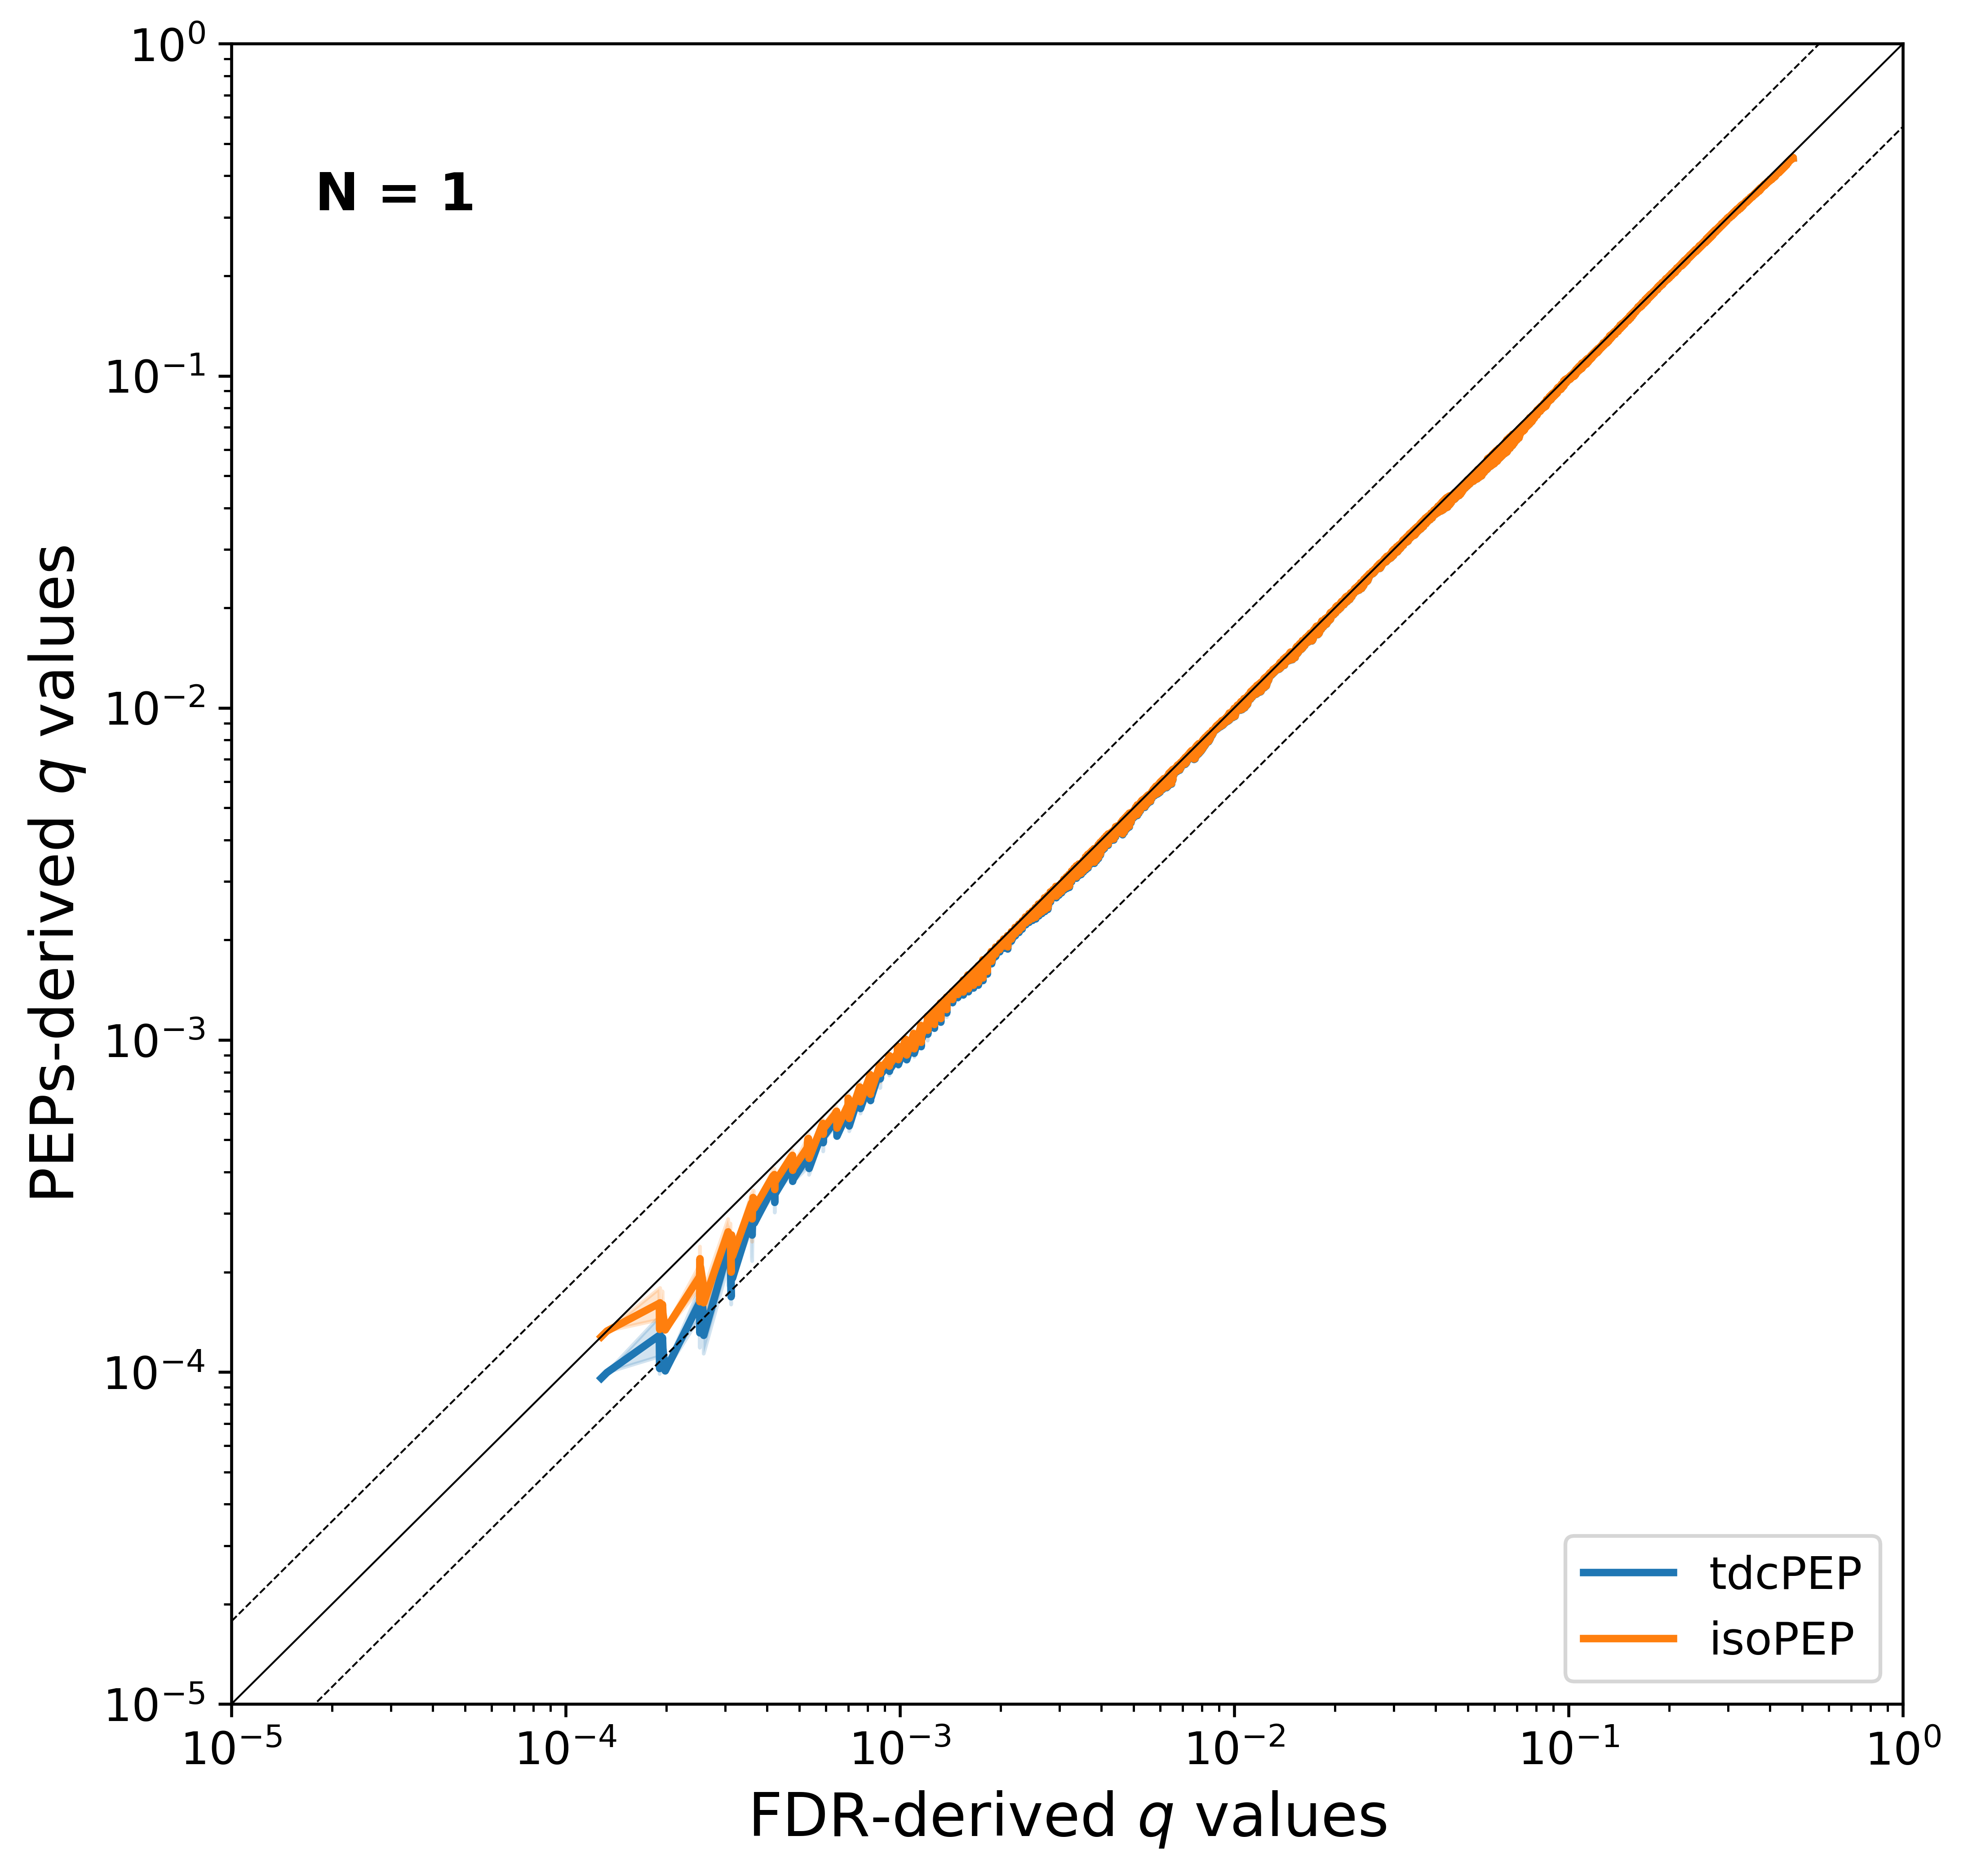

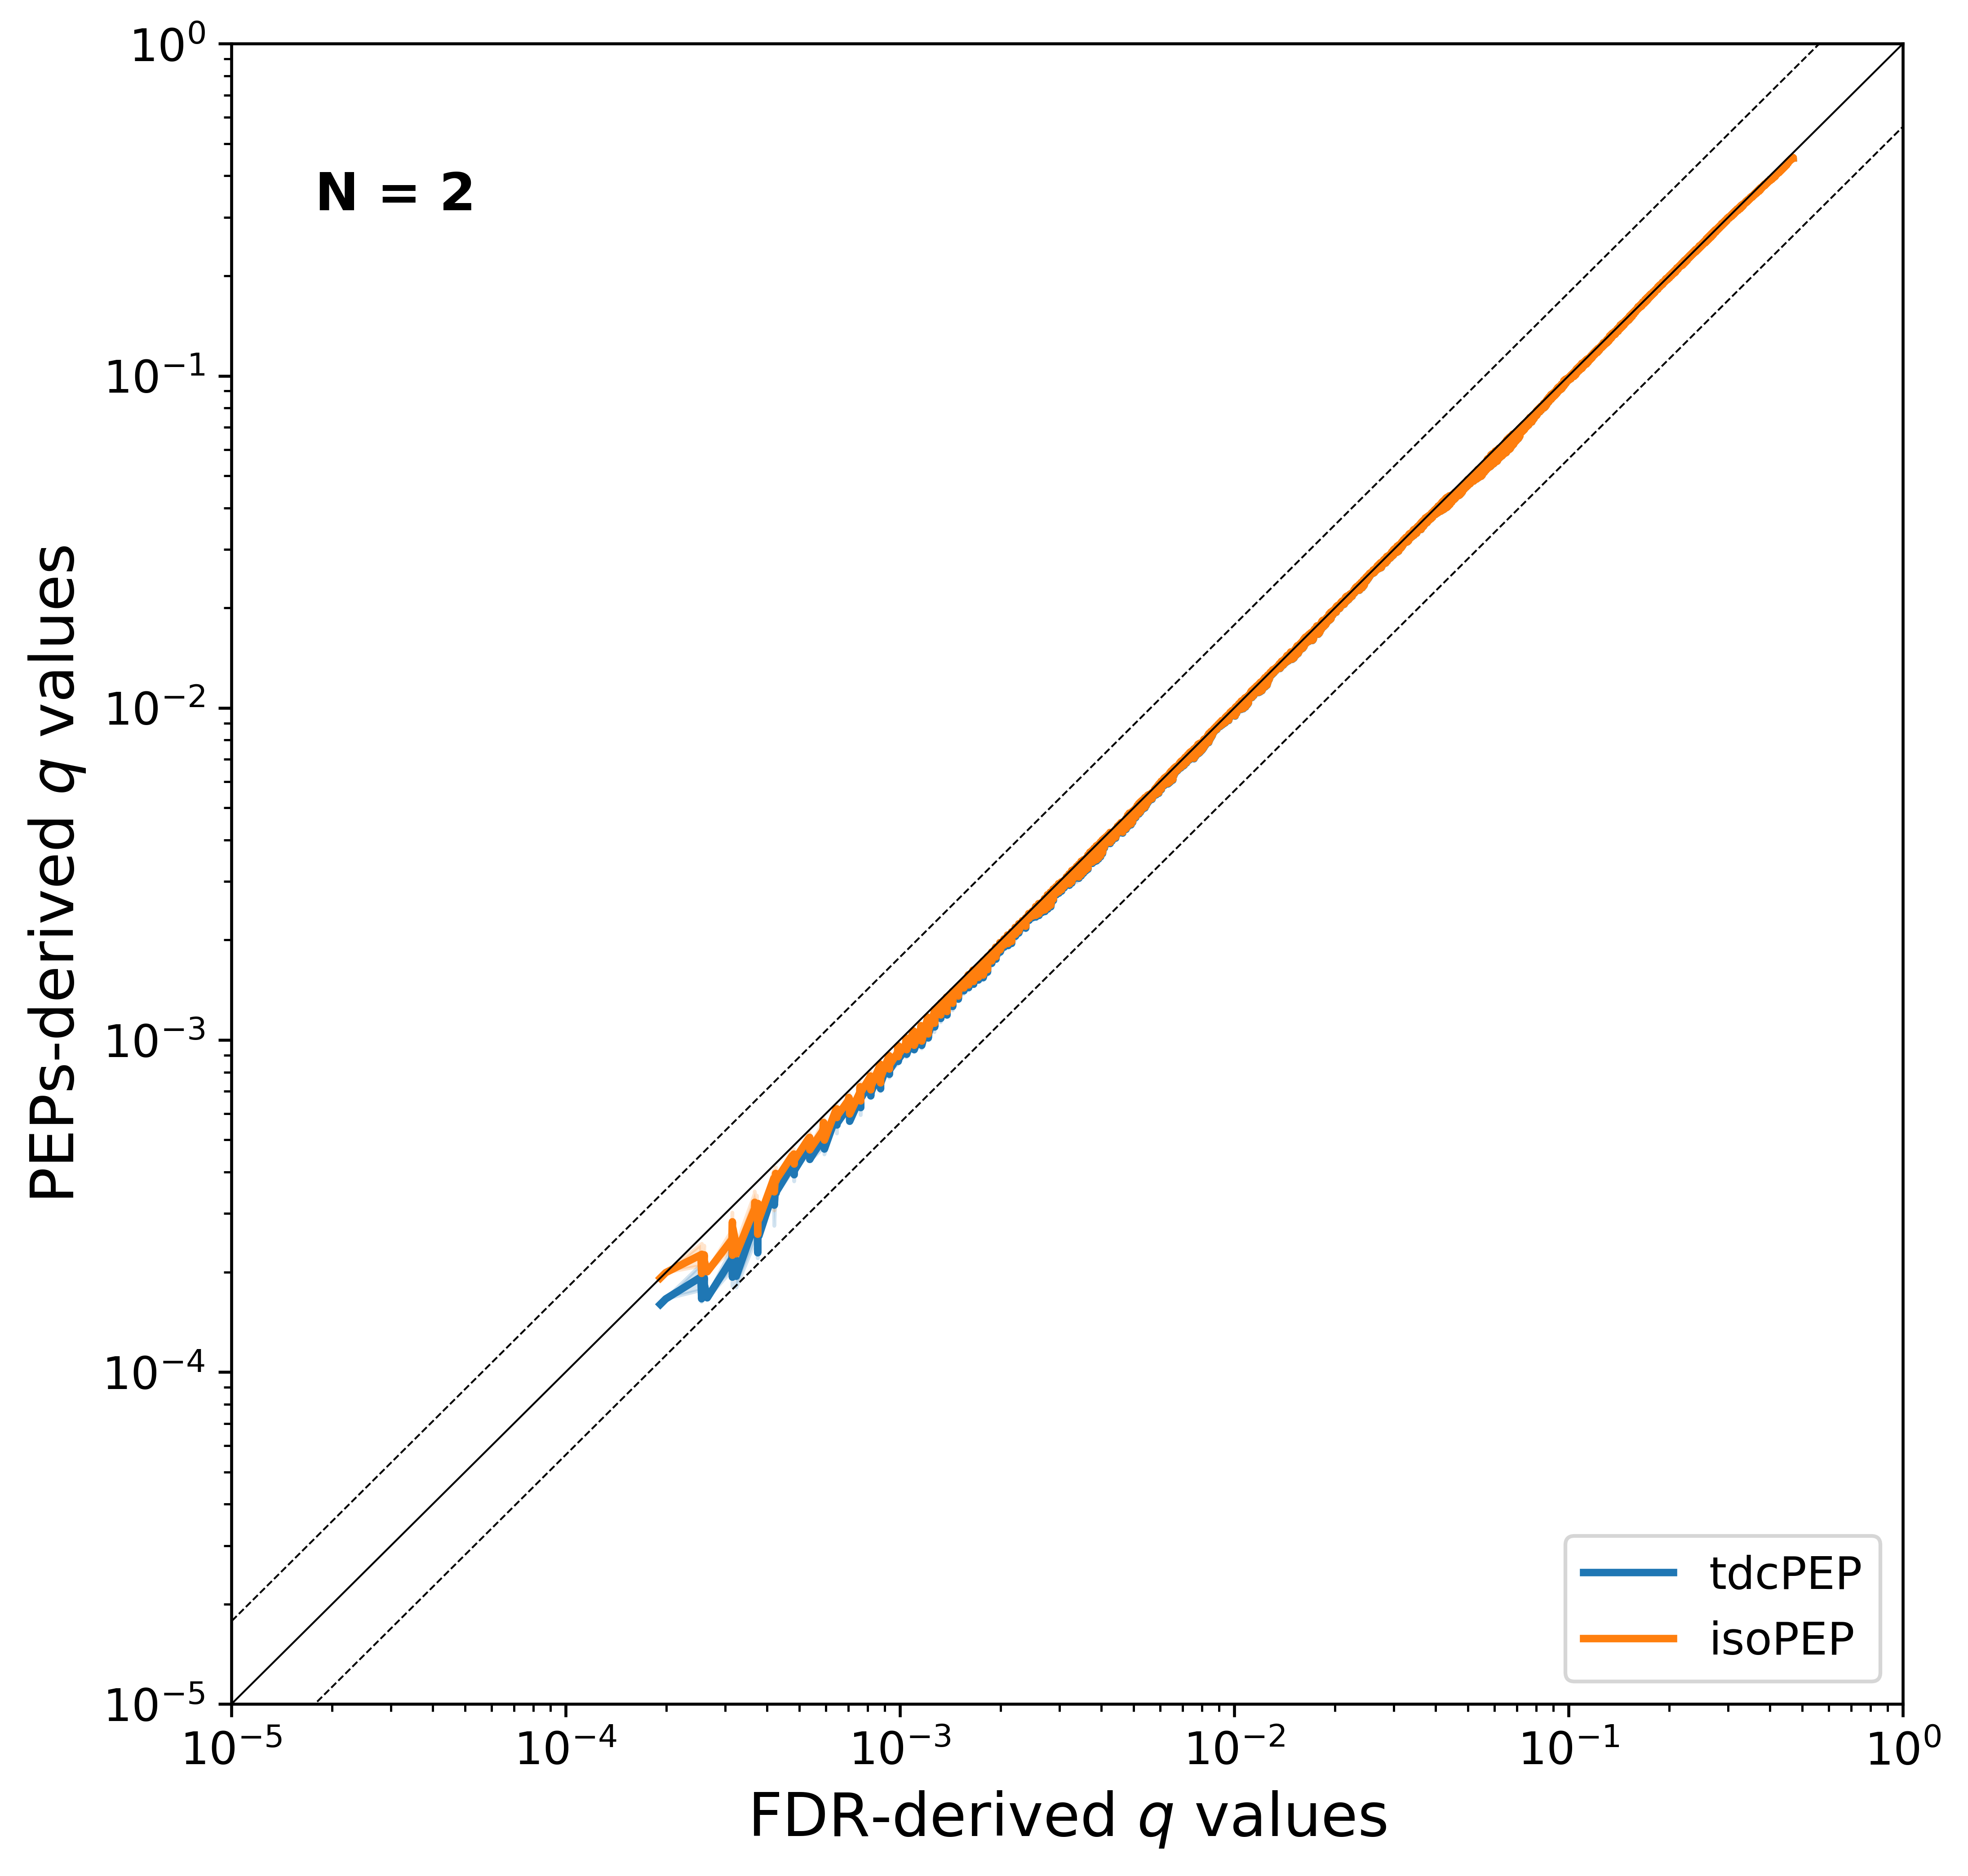

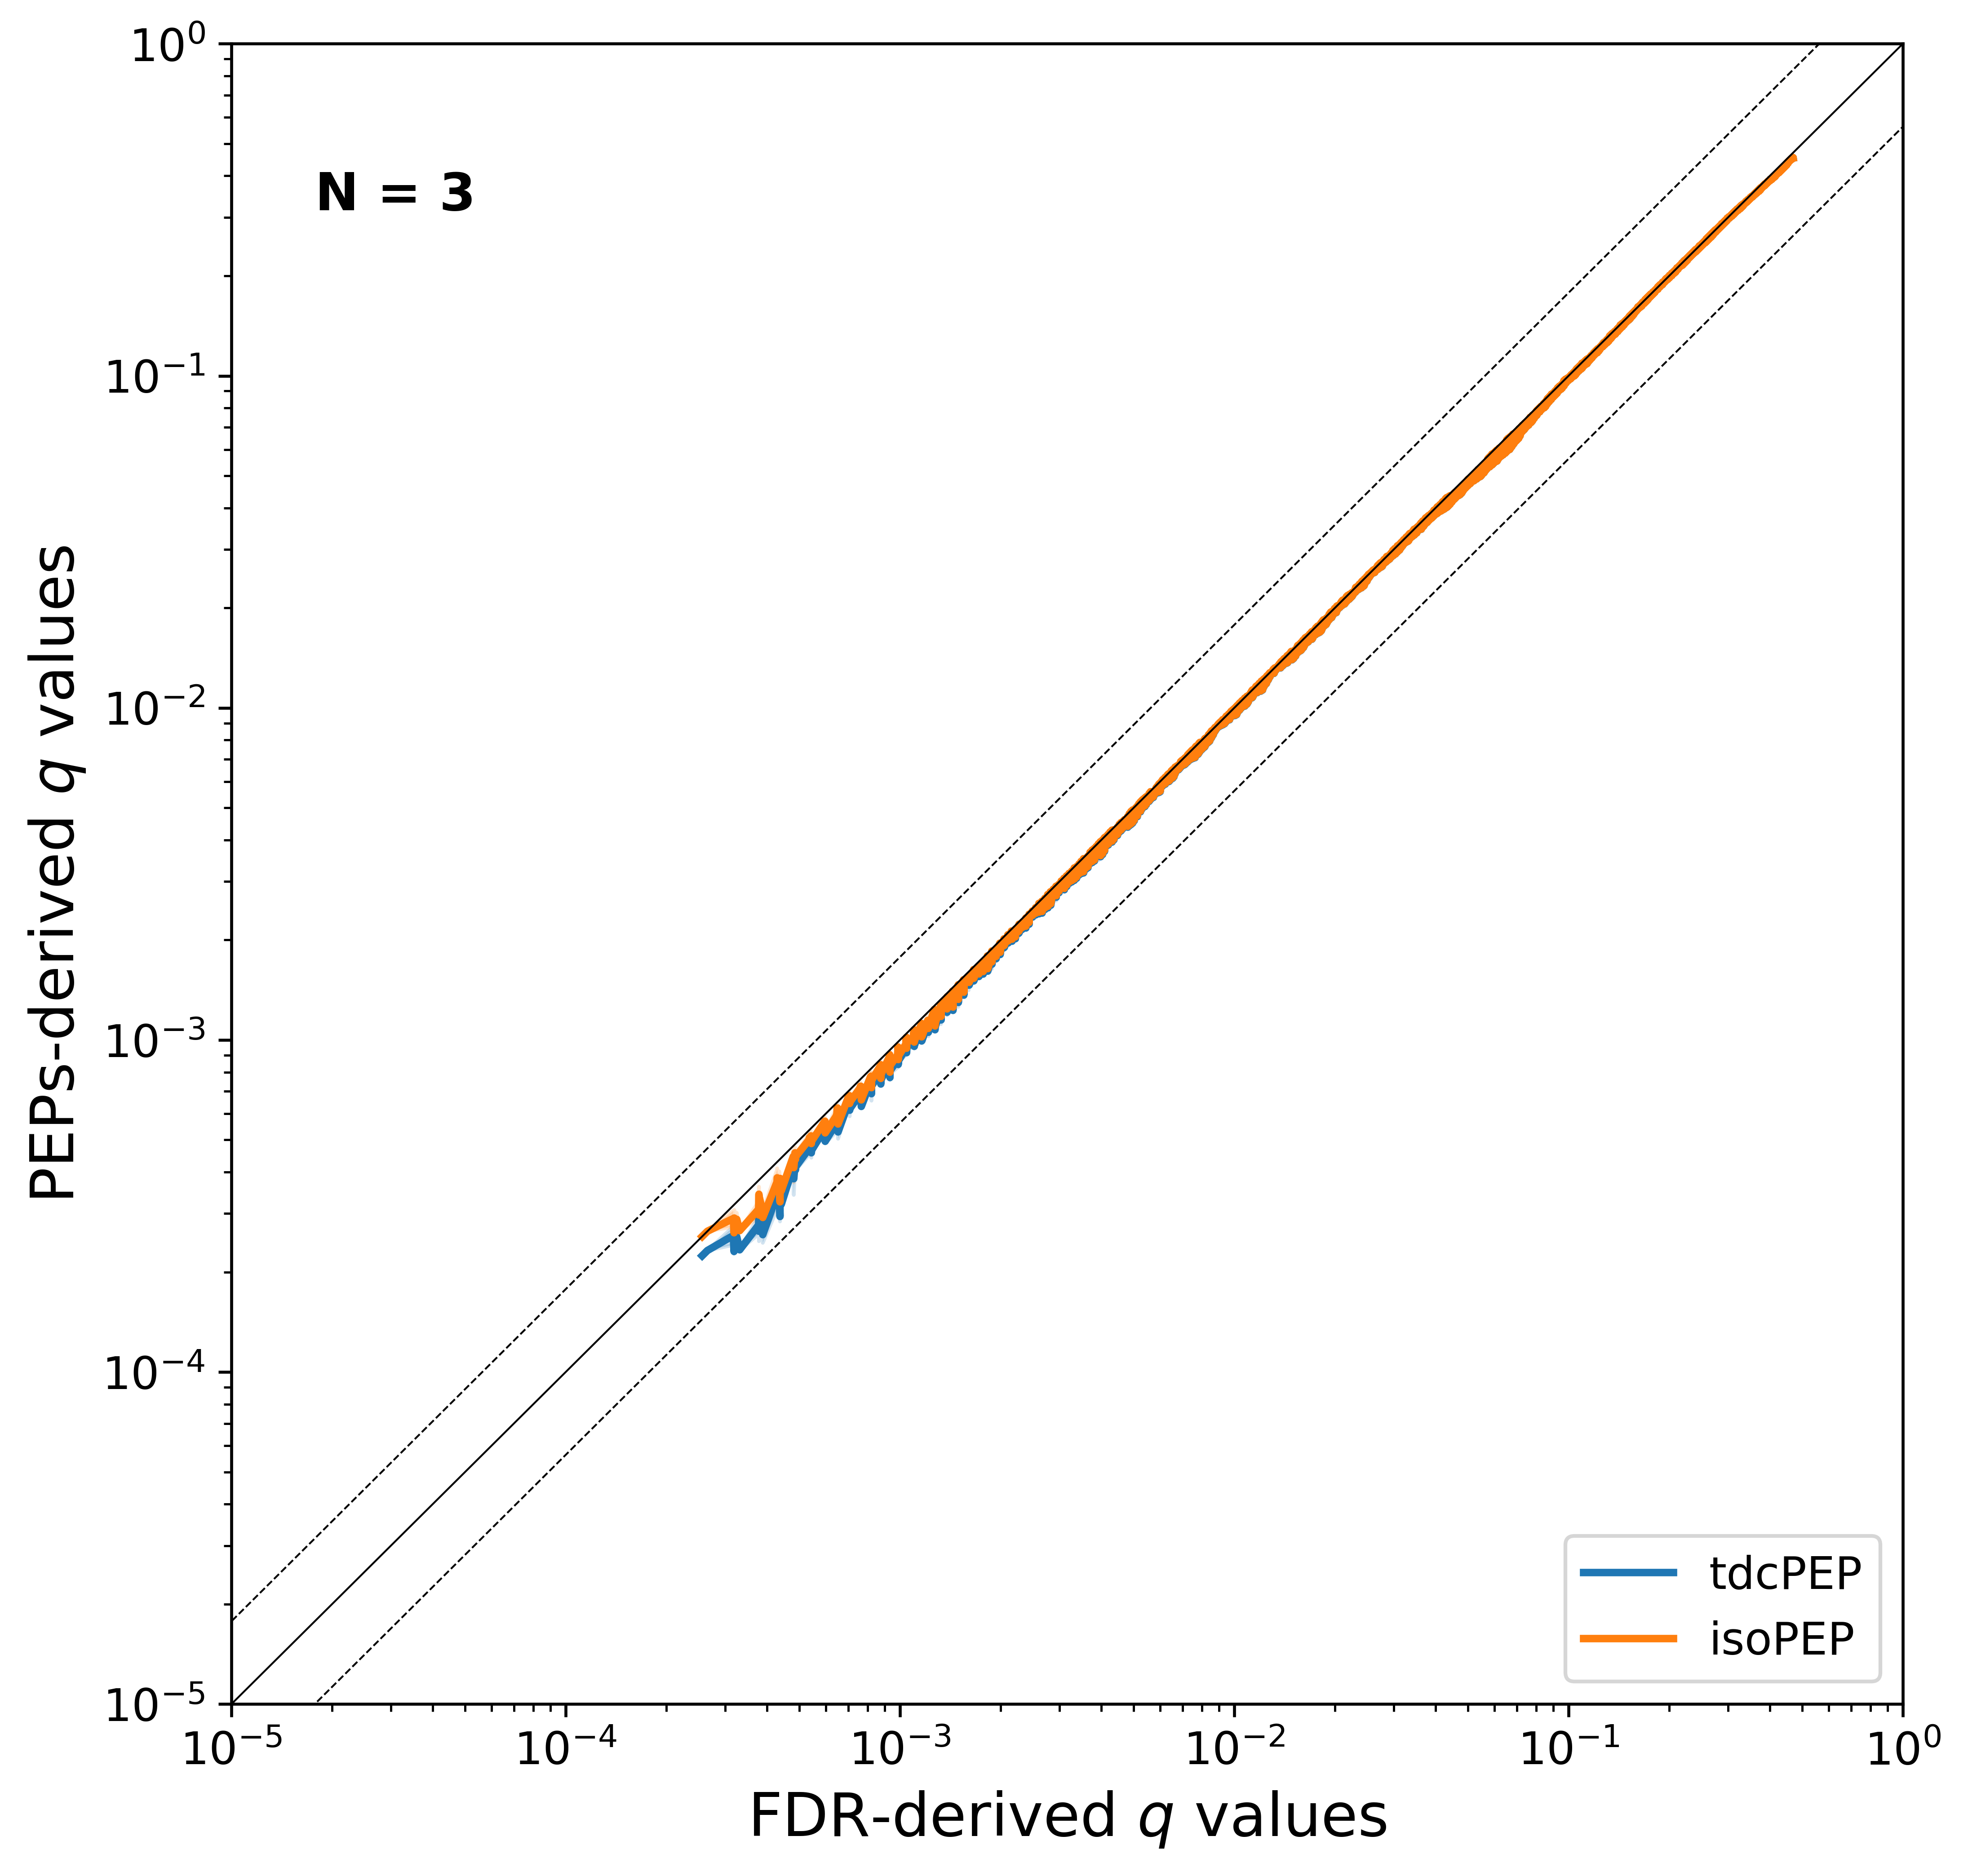

In [16]:
N_values = [i for i in range(4)]
num_runs = 10
output_dir = "output"
# models = ["tdcPEP", "ipPEP", "isoPEP", "splinePEP"]
models = ["tdcPEP", "isoPEP"]
for N in N_values:
    plt.figure(figsize=(8, 8), dpi=600)
    plt.text(0.05, 0.9, f"N = {N}", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    results = []
    for run in range(1, num_runs + 1):
        for model in models:
            df = pd.read_csv(f"{output_dir}/run{run}/{model}/{N}/q_pep.txt", sep="\t")
            results.append(pd.DataFrame({
            "q-value": df["q-value"],
            "q_est": df["q_est"],
            "model": model
            }))
    df = pd.concat(results)
    sns.lineplot(data=df, x="q-value", y="q_est", hue="model", errorbar="sd", linewidth=2)

    a = np.linspace(0, 1, 100)
    b = a / 10 ** 0.25
    c = a * 10 ** 0.25
    plt.plot(a, b, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, c, c="k", linewidth=0.5, linestyle="--")
    plt.plot(a, a, c="k", linewidth=0.5)
    plt.xlabel("FDR-derived $q$ values", fontsize=16)
    plt.ylabel("PEPs-derived $q$ values", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='lower right', fontsize=12)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.00001, 1)
    plt.ylim(0.00001, 1)
    plt.savefig(f"figs/decoy_influence.N{N}.png", bbox_inches="tight")
    plt.show()